In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Linear_Model:
    '''
    The mother of all linear model.
    Any descendents must follow three steps:
        - _basis_funcs
        - _fit, _reg_fit
        - _predict
    '''
    
    def _basis_funcs(self, basis_funcs):
        self.basis_funcs = basis_funcs
    
    def _design_matrix(self, X):
        mat = []
        for i in X:
            line = []
            for f in self.basis_funcs:
                line.append(f(i))
            mat.append(line)
        return np.array(mat)    
        
    def _fit(self, X, y, lam):
        dmat = self._design_matrix(X)
        imat = lam * np.identity(dmat.shape[1]) + dmat.T @ dmat
        self.w = np.linalg.inv(imat) @ dmat.T @ y
        
    def _predict(self, X):
        return self._design_matrix(X) @ self.w
    

    
class Linear_Regression(Linear_Model):
    
    def fit(self, X, y, lam=0):
        
        def l(n):
            def f(x):
                return x[n]
            return f
        L = [l(i) for i in range(X.shape[1])]
        
        self._basis_funcs(L)
        self._fit(X, y, lam)        
        
    def predict(self, X):
        return self._predict(X)

In [168]:
X1, y1 = make_regression(4000, 50, 5, bias=5, noise=0.3)
X2, y2 = make_regression(3000, 50, 20, bias=1, noise=0.5)
X3, y3 = make_regression(3000, 50, 10, bias=3, noise=2)
X2 += 0.3
X3 += 0.6
X = np.concatenate([X1, X2, X3])
y = np.concatenate([y1, y2, y3])

X_train, X_test, y_train, y_test = train_test_split(X, y)

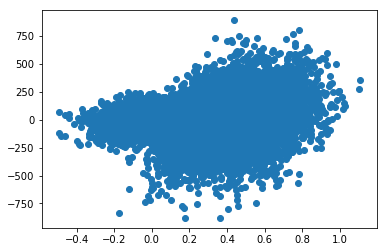

In [169]:
plt.scatter(np.average(X_train, axis=1), y_train)
plt.show()

In [170]:
# Linear Regression
M = Linear_Regression()
M.fit(X_train, y_train, 3)
mean_squared_error(M.predict(X_test), y_test)

29982.845846442353

In [151]:
class Bayesian_Linear_Model:
    '''
    The mother of all bayesian linear model.
    Any descendents must follow three steps:
        - _basis_funcs
        - _fit, _reg_fit
        - _predict
    '''
    
    def _basis_funcs(self, basis_funcs):
        self.basis_funcs = basis_funcs
    
    def _design_matrix(self, X):
        mat = []
        for i in X:
            line = []
            for f in self.basis_funcs:
                line.append(f(i))
            mat.append(line)
        return np.array(mat)    
        
    def _fit(self, X, y, a, b):
        '''
        a: the prior of distribution of weights
        b: the instrinsic value of variance of target value
        '''
        dmat = self._design_matrix(X)
        # The variance of weights posterior
        wv = a * np.eye(dmat.shape[1]) + b * (dmat.T @ dmat)
        # The expectation of weights
        self.w = (b * np.linalg.inv(wv)) @ dmat.T @ y
        # Store the hyper parameters
        self.b = b
        self.a = a

    # Return the expectation of the predicted value    
    def _predict(self, X):
        return self._design_matrix(X) @ self.w
        
    # Return the variance of the predicted distribution
    def _var(self, X):
        dmat = self._design_matrix(X)
        wv = self.a * np.eye(dmat.shape[1]) + self.b * (dmat.T @ dmat)
        return 1/self.b + dmat @ np.linalg.inv(wv) @ dmat.T

    
class Bayesian_Linear_Regression(Bayesian_Linear_Model):
    
    def fit(self, X, y, a, b):
        
        def l(n):
            def f(x):
                return x[n]
            return f
        L = [l(i) for i in range(X.shape[1])]
        
        self._basis_funcs(L)
        self._fit(X, y, a, b)        
        
    def predict(self, X, return_var=False):
        if return_var == True:
            return self._predict(X), self._var(X)
        return self._predict(X)

In [179]:
L = Bayesian_Linear_Regression()
L.fit(X_train, y_train, 1, 1)
y_pred, var = L.predict(X_test, True) 
mean_squared_error(y_pred, y_test)

29983.064775385355